<a href="https://colab.research.google.com/github/rahulranjansah/data_mining/blob/main/datamania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [159]:
import pandas as pd
import numpy as np

def prep_ufo_data(df):

    def custom_to_datetime(date):
        if date[11:13] == "24":
            x = date[:11] + "23:59"
        elif date[10:12] == "24":
            x = date[:10] + "23:59"
        elif date[9:11] == "24":
            x = date[:9] +  "23:59"
        else:
            return pd.to_datetime(date)

        return pd.to_datetime(x)

    # numeric_val and cleaning position
    df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
    df["lognitude"] = pd.to_numeric(df["longitude"], errors="coerce")
    df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce")

    df.loc[:,"latitude"].replace({0.0: np.nan}, inplace=True)
    df.loc[:, "longitude"].replace({0.0: np.nan}, inplace=True)
    df.loc[:,"duration (seconds)"].replace({0.0: np.nan}, inplace=True)
    df.index = np.arange(0, len(df))

    # initialzing datetime series with time of report
    df["datetime"] = df["datetime"].apply(custom_to_datetime)
    df["date posted"] = pd.to_datetime(df["date posted"])

    df["month"] = pd.DatetimeIndex(df["datetime"]).month
    df["year"] = pd.DatetimeIndex(df["datetime"]).year
    df["day"] = pd.DatetimeIndex(df["datetime"]).day
    df["hour"] = pd.DatetimeIndex(df["datetime"]).hour

    return df



In [217]:
# global imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn


# local imports
# from clean import prep_ufo_data

df = pd.read_csv("ufo_sightings.csv", on_bad_lines="skip", low_memory=False)
# print(df.head(50))
print(type(df["datetime"]))
df2 = prep_ufo_data(df)
print(type(df2["datetime"]))
print(df2.head(50))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
              datetime                           city state country  \
0  1949-10-10 20:30:00                     san marcos    tx      us   
1  1949-10-10 21:00:00                   lackland afb    tx     NaN   
2  1955-10-10 17:00:00           chester (uk/england)   NaN      gb   
3  1956-10-10 21:00:00                           edna    tx      us   
4  1960-10-10 20:00:00                        kaneohe    hi      us   
5  1961-10-10 19:00:00                        bristol    tn      us   
6  1965-10-10 21:00:00             penarth (uk/wales)   NaN      gb   
7  1965-10-10 23:45:00                        norwalk    ct      us   
8  1966-10-10 20:00:00                      pell city    al      us   
9  1966-10-10 21:00:00                       live oak    fl      us   
10 1968-10-10 13:00:00                      hawthorne    ca      us   
11 1968-10-10 19:00:00                        brevard    nc      us   
12 19

##Locations
- lat and long parsing
- scatter plot




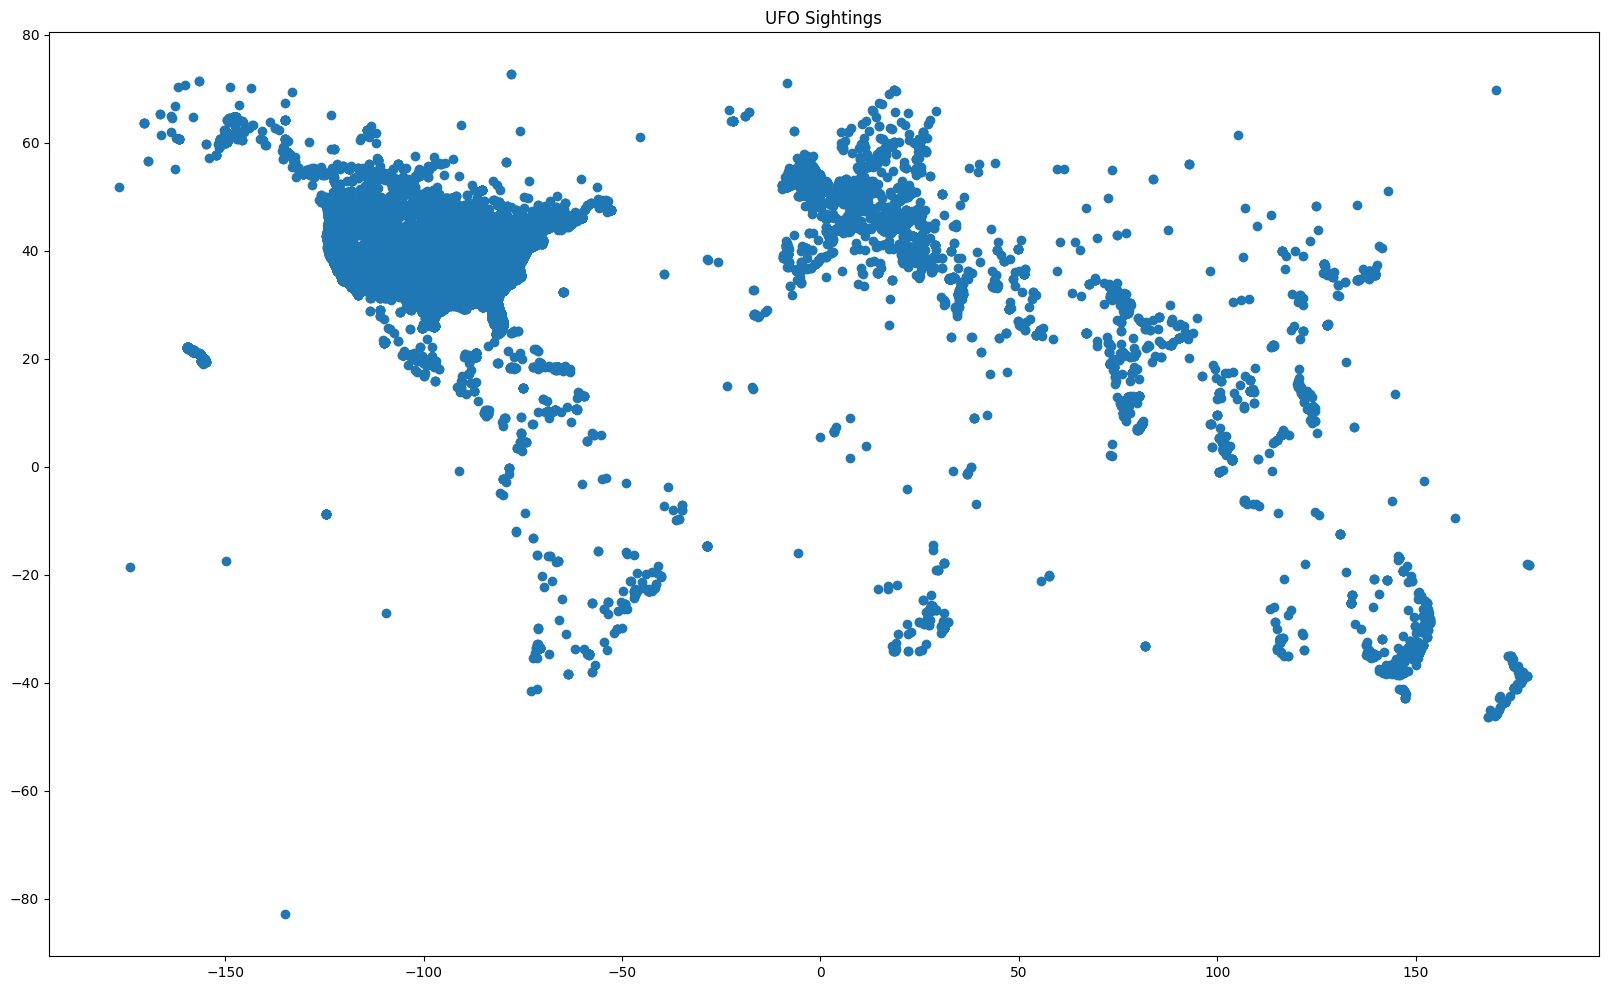

In [218]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12)

x = df2["lognitude"]
y = df2["latitude"]

ax.scatter(x,y)

ax.set_title("UFO Sightings")
plt.show()

In [219]:
top_cities = (df2[["city", "datetime"]]
.groupby("city")
.count()
.rename(columns={"datetime":"cnt"})
.sort_values("cnt", ascending=False)
).head()

In [222]:
# Group the data by city and calculate the count and mean
city_data = df2.groupby('city').agg(
    Count=pd.NamedAgg(column='city', aggfunc='count'),
    Latitude=pd.NamedAgg(column='latitude', aggfunc='mean'),
    Longitude=pd.NamedAgg(column='longitude', aggfunc='mean')
).reset_index()

In [228]:
import geopandas as gpd
import plotly.express as px
import plotly.io as py
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the plot
fig = px.scatter_geo(city_data, lat='Latitude', lon='Longitude',
                     projection='natural earth',
                     color='Count',
                     size='Count',
                     hover_name='city',
                     hover_data=['Count'],
                     color_continuous_scale='Viridis')

# Add the world map
fig.update_geos(showcountries=True, countrywidth=0.2)

# Layout
fig.update_layout(
    title_text='UFO Sightings',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)
py.write_html(fig, "ufo_sightings.html")

fig.show()

<ipython-input-228-e785b21e9fcd>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [ ]:
## Cities grouping to see how data looks like
- charts?

In [84]:
df2.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,lognitude,month,year,day,hour
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,-97.941111,10,1949,10,20
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,-98.581082,10,1949,10,21


In [85]:
top_cities = (df2[["city", "datetime"]]
.groupby("city")
.count()
.rename(columns={"datetime":"cnt"})
.sort_values("cnt", ascending=False)
).head(10)
print(top_cities)

             cnt
city            
seattle      570
phoenix      488
portland     399
las vegas    395
los angeles  375
san diego    361
houston      317
chicago      295
miami        258
tucson       258


<Axes: title={'center': 'Top Cities'}, xlabel='city'>

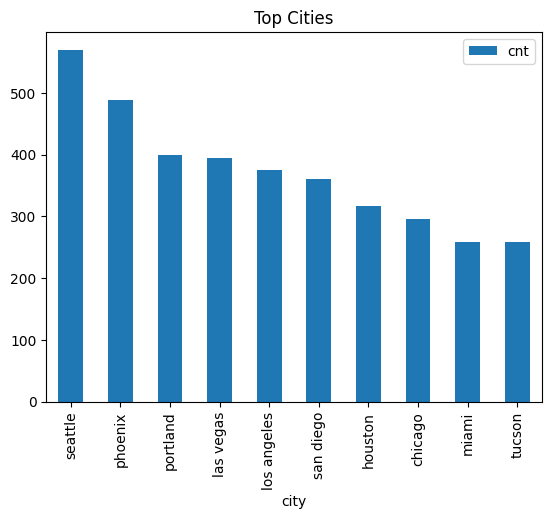

In [86]:
top_cities.plot.bar(title="Top Cities") # quickplots using pandas, a thing to be considered in both of the data which ranks high is based on army bases presence.

In [87]:
## Time of sightings
- When: years: time series line chart
- Weekdays: barchart
- Hours: barchart


SyntaxError: illegal target for annotation (<ipython-input-87-c5646d050c31>, line 2)

In [88]:
import seaborn as sns

# Syntax
# sns.lineplot(x, y, data)


In [89]:
year_group = (df2[["year", "datetime"]]
.groupby("year")
.count()
.rename(columns={"datetime":"cnt"})
).loc[:2013]


In [90]:
year_group

,cnt
year,
1906,1
1910,3
1914,1
1916,1
1917,1
...,...
2009,4932
2010,4690
2011,5521


<Axes: xlabel='year', ylabel='cnt'>

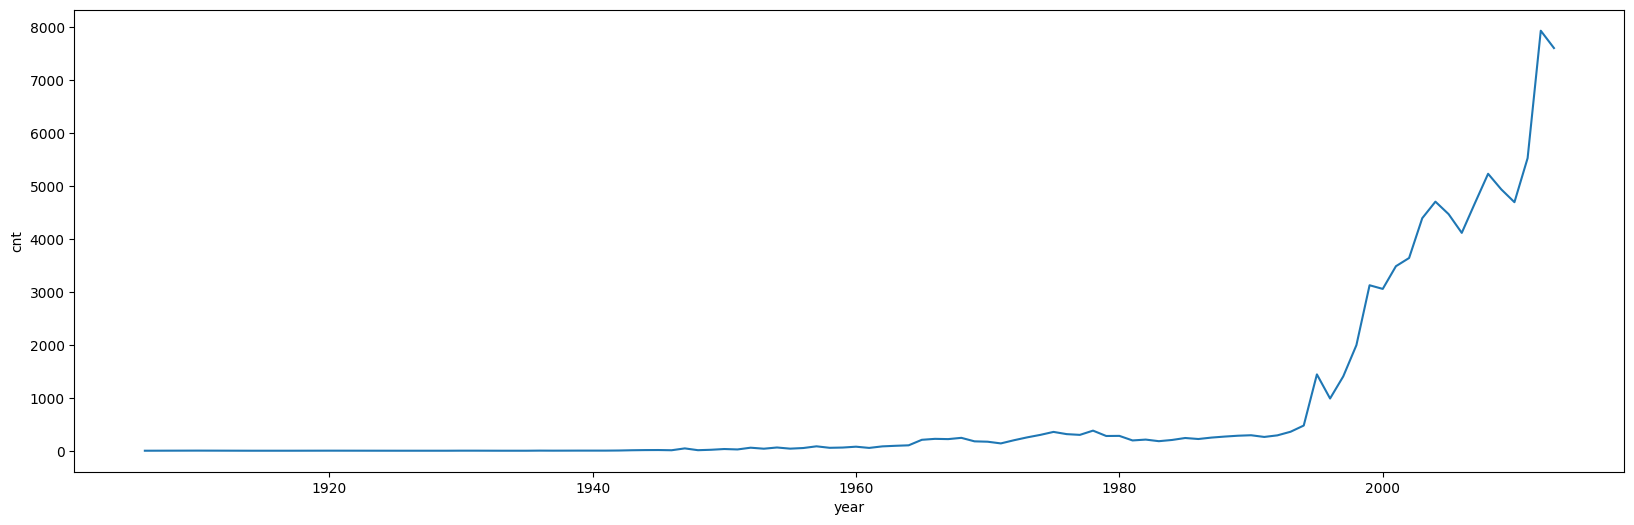

In [91]:
plt.figure(figsize=(20,6))
sns.lineplot(x="year", y="cnt", data=year_group)


In [92]:
import plotly.express as px

fig = px.line(year_group, x=year_group.index, y=year_group.cnt, title='Visibility of UFOs')
fig.show()
fig.write_html("output.html") # x-files started streaming about ufo

In [137]:
# initialize dayofweek column with 0 as Monday.
df2.loc[:, "weekday"] = df2["datetime"].dt.day_name()

In [138]:
df2.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,lognitude,month,year,day,hour,weekday
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,-97.941111,10,1949,10,20,Monday
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,-98.581082,10,1949,10,21,Monday
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,-2.916667,10,1955,10,17,Monday
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,-96.645833,10,1956,10,21,Wednesday
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,-157.803611,10,1960,10,20,Monday


In [146]:
df2['weekday'] = pd.Categorical(df2['weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

weekday_group = (df2[["weekday", "datetime"]]
.groupby("weekday", sort=False)
.count()
.rename(columns={"datetime":"cnt"})
)

print(weekday_group)

             cnt
weekday         
Monday     11166
Tuesday    11915
Wednesday  12116
Thursday   12181
Friday     12778
Saturday   15427
Sunday     13096


In [145]:
fig = px.bar(weekday_group, x=weekday_group.index, y=weekday_group.cnt, labels={'x':'Weekday', 'cnt':'Count'}, title='Count of Sightings by Weekday')
plt.figure(figsize=(10,6))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [98]:
month_group = (df2[["month", "datetime"]]
.groupby("month")
.count()
.rename(columns={"datetime":"cnt"})
)


In [99]:
month_group

,cnt
month,
1,6364
2,5178
3,6022
4,6084
5,5877
6,9166
7,10371
8,9420
9,8328


<ipython-input-114-aafbb41aa797>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'UFO observation peak months')

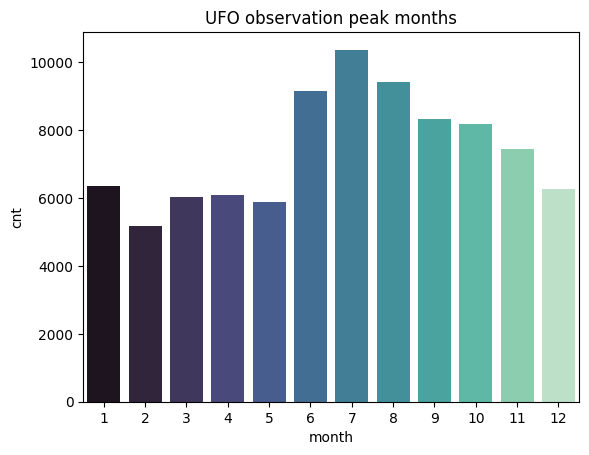

In [114]:
sns.barplot(x=month_group.index, y=month_group.cnt, data=month_group, palette="mako")
plt.title("UFO observation peak months")

In [116]:
hour_group = (df2[["hour", "datetime"]]
.groupby("hour")
.count()
.rename(columns={"datetime":"cnt"})
)

In [118]:
print(hour_group)

        cnt
hour       
0      4599
1      3582
2      2623
3      2219
4      1695
5      1740
6      1328
7      1034
8       917
9      1095
10     1331
11     1306
12     1601
13     1500
14     1479
15     1595
16     1810
17     2816
18     4367
19     6655
20     9322
21    12299
22    11748
23    10018


<ipython-input-121-3b8d55a20d36>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'UFO observation peak hours')

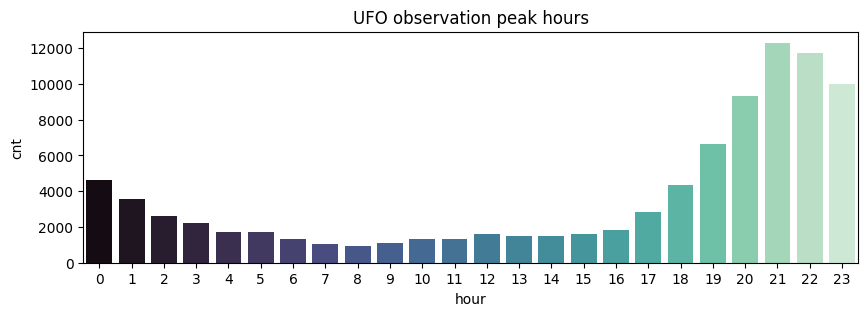

In [121]:
plt.figure(figsize=(10,3))
sns.barplot(x=hour_group.index, y=hour_group.cnt, data=hour_group, palette="mako")
plt.title("UFO observation peak hours")

In [122]:
df2.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,lognitude,month,year,day,hour,weekday
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,-97.941111,10,1949,10,20,0
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,-98.581082,10,1949,10,21,0
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,-2.916667,10,1955,10,17,0
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,-96.645833,10,1956,10,21,2
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,-157.803611,10,1960,10,20,0


In [126]:
df2["shape"].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg', 'flash',
       'diamond', 'cross', 'teardrop', 'cone', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome', 'changed'], dtype=object)

In [127]:
df2["country"].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [128]:
country_group = (df2[["country", "datetime"]]
.groupby("country")
.count()
.rename(columns={"datetime":"cnt"})
)


In [134]:
nan_count = df2["country"].isna().sum()
print(nan_count)

12365


In [150]:
filt = (df2["shape"].isin(["unknown", "light", "flare", "nan"]))
shape_filtered_df = df2[~filt]



In [151]:
shape_filtered_df["shape"].unique()

array(['cylinder', 'circle', 'sphere', 'disk', 'fireball', 'oval',
       'other', 'cigar', 'rectangle', 'chevron', 'triangle', 'formation',
       nan, 'delta', 'changing', 'egg', 'flash', 'diamond', 'cross',
       'teardrop', 'cone', 'pyramid', 'round', 'crescent', 'hexagon',
       'dome', 'changed'], dtype=object)

In [152]:
shape_filtered_df.shape

(64487, 17)

In [169]:
filt = ((df2["duration (seconds)"] > 3600) | (df2["duration (seconds)"] < 5))
duration_filt_df = df[~filt]

In [163]:
type(df2["duration (seconds)"])

pandas.core.series.Series

In [170]:
duration_filt_df.shape

(79737, 16)

In [185]:
filt = (df2["shape"].isin(["unknown", "light", "flare", "nan"]) | (df2["duration (seconds)"] > 3600) | (df2["duration (seconds)"] < 5))
filt_df = df[~filt]

In [186]:
filt_df.shape

(58100, 16)

In [187]:
import re

In [174]:
from typing import Counter
comments = filt_df["comments"]
words = []
for comment in comments:
  if isinstance(comment, str):
    words.extend(re.findall(r'\b\w+\b', comment.lower()))
word_count = Counter(words)

print(word_count.most_common(50))


[('44', 31923), ('the', 26261), ('in', 24147), ('a', 23326), ('and', 18435), ('of', 14823), ('i', 12750), ('object', 11980), ('lights', 11709), ('to', 11527), ('sky', 11005), ('over', 10065), ('was', 9943), ('it', 8554), ('light', 8253), ('at', 8100), ('with', 8013), ('on', 7580), ('bright', 7358), ('shaped', 6729), ('orange', 6580), ('moving', 5714), ('red', 5539), ('my', 5497), ('white', 5234), ('from', 5194), ('saw', 5099), ('then', 4900), ('craft', 4836), ('ufo', 4594), ('seen', 4277), ('very', 4090), ('flying', 4032), ('like', 4007), ('that', 3800), ('quot', 3581), ('large', 3445), ('no', 3305), ('objects', 3295), ('triangle', 3235), ('3', 3221), ('two', 3056), ('we', 3007), ('for', 2916), ('shape', 2910), ('hovering', 2782), ('were', 2759), ('about', 2739), ('night', 2679), ('up', 2650)]


In [188]:
# string type define comments
comments = filt_df["comments"].apply(lambda x: str(x))


In [197]:
import nltk

nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [200]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [203]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import pos_tag


filt_df["comments"] = filt_df["comments"].astype(str)

# Extract the 'comments' column
comments = filt_df['comments']

# Tokenize the comments
words = word_tokenize(' '.join(comments))


# Remove punctuation and convert to lower case
words = [word.lower() for word in words if word.isalpha()]
custom_stop_words = ["i", "we", "a", "&", "the", "to", "as", "i", "we", "or", "ISS"]

# Remove stopwords
stop_words = set(stopwords.words('english') + custom_stop_words)
words = [word for word in words if word not in stop_words]


# Part-of-speech tagging
tagged = nltk.pos_tag(words)

# Filter out prepositions, verbs, etc.
filtered_words = [word for word, pos in tagged if pos not in ('IN', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')]

# Count the frequency of each word
word_counts = Counter(filtered_words)



<ipython-input-203-70d53f24ce5a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [205]:
# Display the most common words
print(word_counts.most_common(100))

[('lights', 11497), ('sky', 10174), ('object', 9929), ('light', 7401), ('bright', 5842), ('orange', 4996), ('white', 4837), ('craft', 4645), ('ufo', 4389), ('red', 4143), ('large', 3433), ('quot', 3185), ('two', 3040), ('objects', 2967), ('triangle', 2796), ('shape', 2734), ('night', 2649), ('one', 2603), ('triangular', 2352), ('formation', 2263), ('north', 2146), ('three', 1984), ('green', 1973), ('west', 1961), ('slowly', 1956), ('south', 1950), ('east', 1893), ('blue', 1879), ('fast', 1850), ('fireball', 1847), ('low', 1836), ('high', 1788), ('black', 1759), ('ball', 1682), ('speed', 1597), ('sphere', 1591), ('sound', 1501), ('round', 1499), ('nuforc', 1416), ('note', 1412), ('circular', 1405), ('star', 1370), ('strange', 1333), ('oval', 1300), ('silent', 1272), ('small', 1254), ('saw', 1229), ('minutes', 1198), ('pd', 1177), ('silver', 1164), ('slow', 1080), ('back', 1017), ('house', 990), ('area', 982), ('disk', 972), ('away', 956), ('huge', 953), ('aircraft', 952), ('cigar', 917)

In [209]:
from wordcloud import WordCloud, STOPWORDS

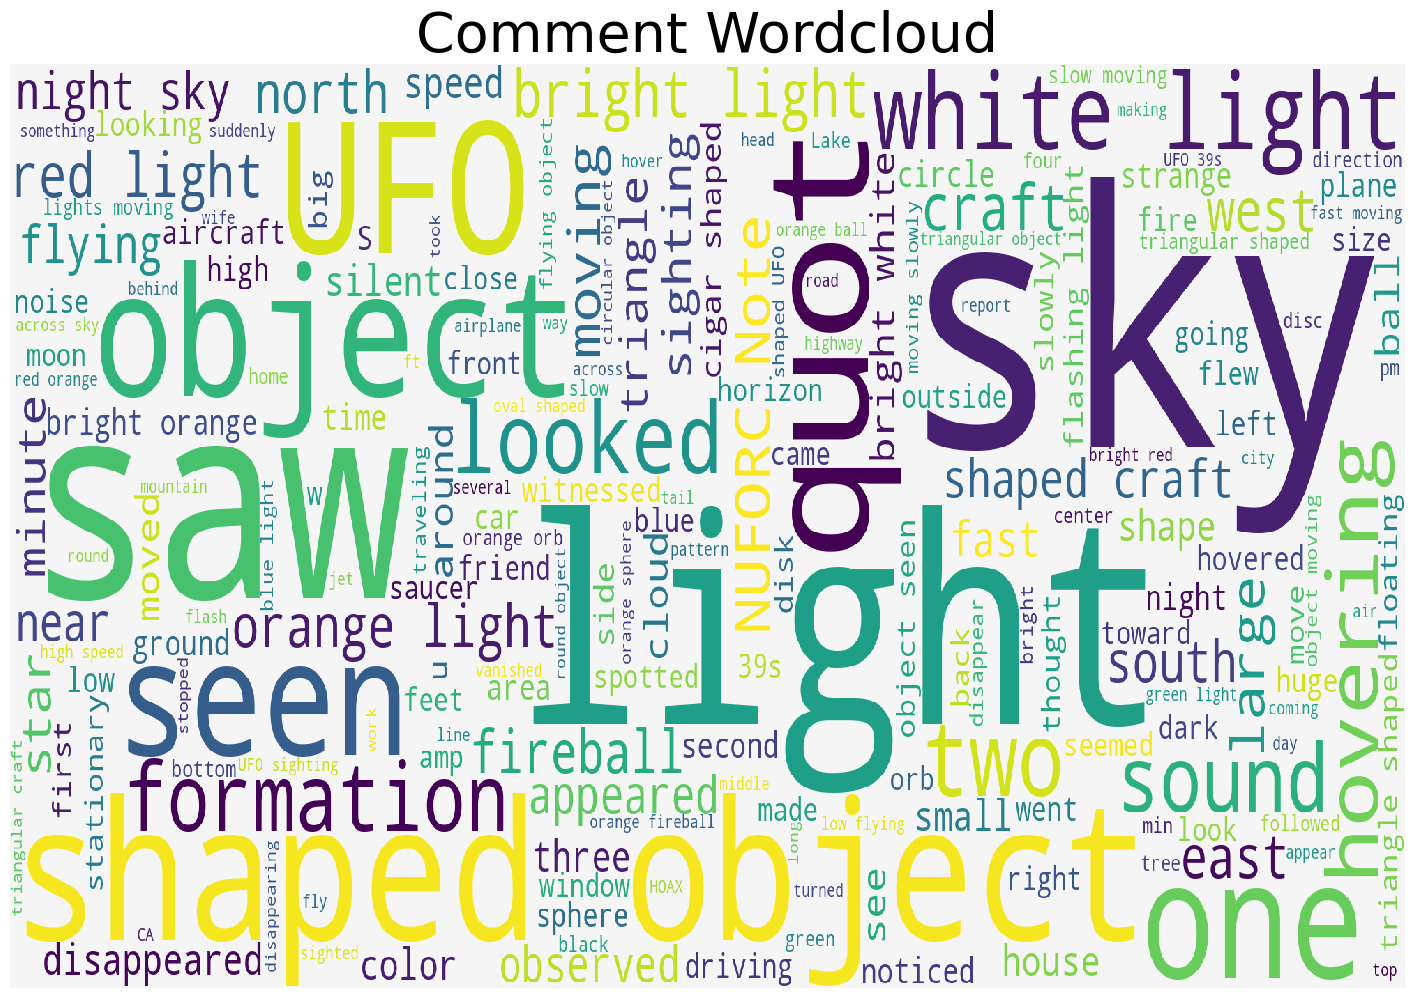

In [210]:
cmt = [item for item in filt_df.comments.dropna()]

cmt = " ".join(cmt)

plt.figure(figsize=(18,12))

wordcloud = WordCloud(background_color='whitesmoke', width=2000, height=1000,
                      stopwords=None).generate(cmt)
plt.imshow(wordcloud, interpolation="nearest", aspect='auto')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.title("Comment Wordcloud", size=40)

plt.show()